[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaloADBA/ELE8812-demos/blob/main/Demos/Lesson%204/Leçon_4_Demo_detr2.ipynb)

# ELE8812 - Traitement fréquentielle

## Démo :  Détramage par filtrage ad hoc

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Option d'affichage
plt.rcParams['figure.figsize'] = (16,6)
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
!git clone https://github.com/MaloADBA/ELE8812-demos.git Repo

Mounted at /content/drive


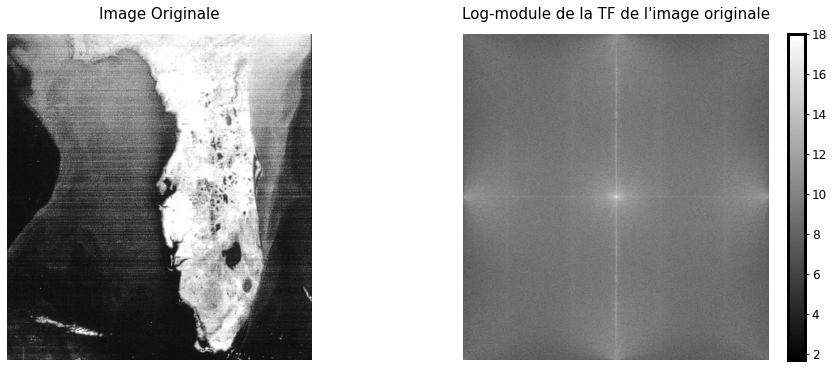

In [3]:
# Charger image
A = plt.imread('Repo/Data/Floride.tif');

# Transformée de Fourier
pad = 30;
Me, Ne = A.shape
AA = np.fft.fftshift(np.fft.fft2(np.double(A), (Me + pad, Ne + pad)))

plt.subplot(121); plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off');
plt.subplot(122); plt.imshow(np.log(np.abs(AA)), cmap='gray'); plt.colorbar(); plt.title("Log-module de la TF de l'image originale"); plt.axis('off'); plt.show();

## Détramage

In [4]:
largeur = 7
fc = 10
l = np.floor(largeur/2);

M,N = AA.shape

M0 = np.ceil((M+1) / 2)
N0 = np.ceil((N+1) / 2)

U, V = np.mgrid[1:M+1, N0-l:N0+l+1]
D2 = (U - M0)**2

HHi = np.ones((M, N))
HHg = np.ones((M, N))


HHg[:, int(N0-l):int(N0+l+1)] = np.exp(-D2 / (2*fc**2))
HHi[:, int(N0-l):int(N0+l+1)] = D2 < fc**2

# filtrage gaussien
BBg = AA * HHg
Bg = np.fft.ifft2(np.fft.ifftshift(BBg))[:Me,:Ne]


# filtrage passe-bas idéal
BBi = AA * HHi;
Bi = np.fft.ifft2(np.fft.ifftshift(BBi))[:Me,:Ne]

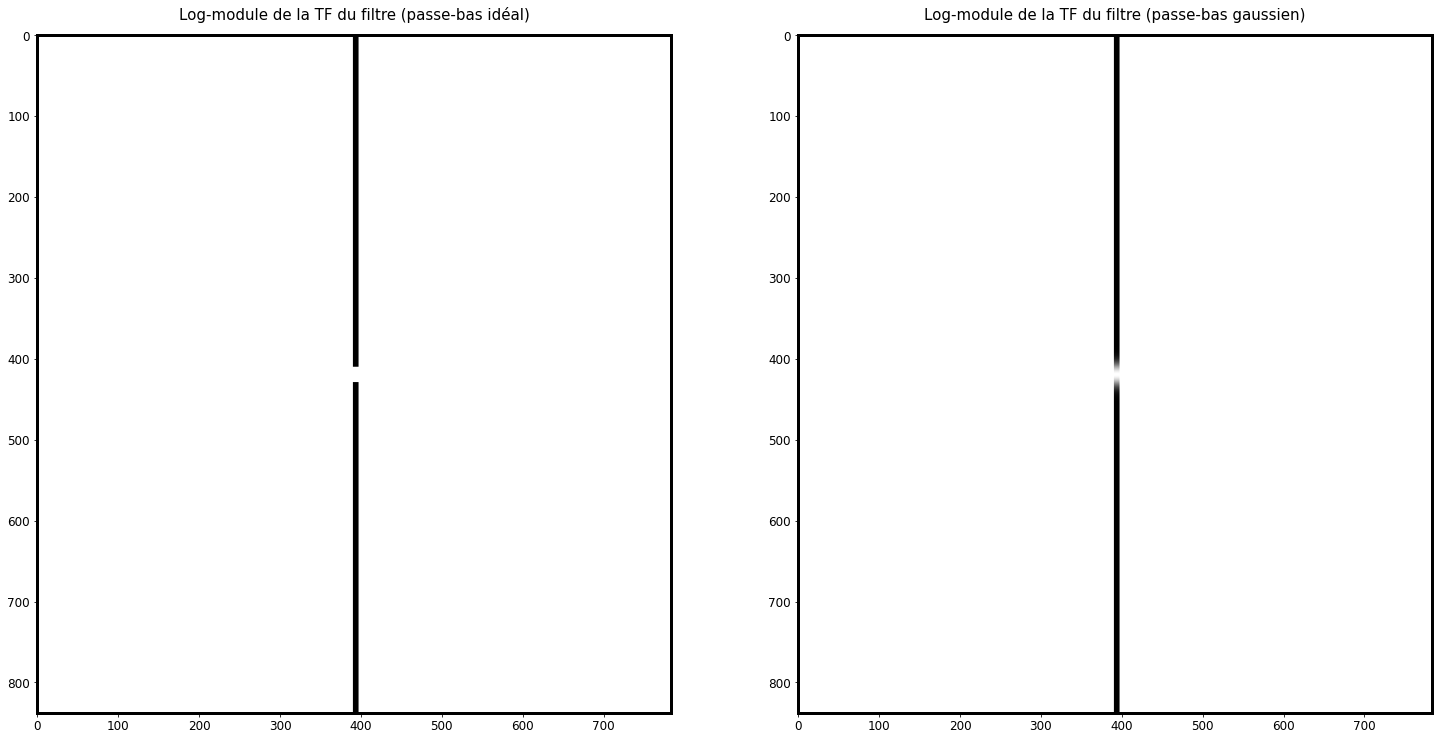

In [ ]:
plt.rcParams['figure.figsize'] = (25,20)

plt.subplot(121); plt.imshow(HHi, cmap='gray'); plt.title('Log-module de la TF du filtre (passe-bas idéal)');
plt.subplot(122); plt.imshow(HHg, cmap='gray'); plt.title('Log-module de la TF du filtre (passe-bas gaussien)');
plt.show()

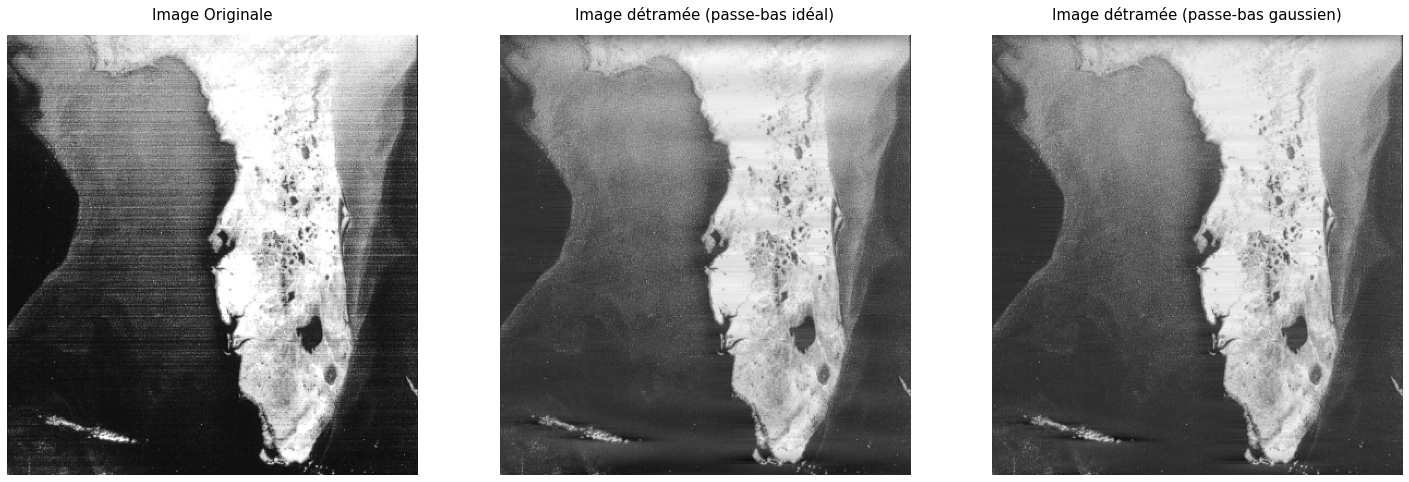

In [ ]:
plt.subplot(131); plt.imshow(A, cmap='gray'); plt.title('Image Originale'); plt.axis('off');
plt.subplot(132); plt.imshow(np.real(Bi), cmap='gray'); plt.axis('off'); plt.title('Image détramée (passe-bas idéal)');
plt.subplot(133); plt.imshow(np.real(Bg), cmap='gray'); plt.axis('off'); plt.title('Image détramée (passe-bas gaussien)');
plt.show()